<a href="https://colab.research.google.com/github/yess-wee/Image-classification-using-CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# datasets.cifar10.load_data()

(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

x_train.shape


170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

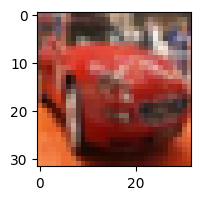

In [7]:
# x_train[2]

plt.figure(figsize = (15,2))
plt.imshow(x_train[5])

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog","frog", "horse", "ship", "truck"]
# class labels

In [11]:
# adding class label to the relevant picture

def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  plt.show()


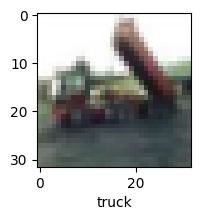

In [12]:
plot_sample(x_train,y_train,2)

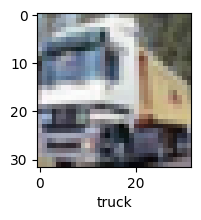

In [13]:
plot_sample(x_train,y_train,1)

In [14]:
# x_train[0]    #we've too large data set, so we have to normalize it first to put in ANN

x_train = x_train / 255
x_test = x_test / 255

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])


#if the values of y is in an array form then we will gonna use catagorical_crossentroy
#and the value of y is hard coded , like y=5 then we'll use sparse_categorical_crossentropy

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 167s 106ms/step - loss: 1.8118 - accuracy: 0.3539
Epoch 2/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.6243 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.5433 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.4833 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 132s 84ms/step - loss: 1.4311 - accuracy: 0.4957


In [16]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.4686 - accuracy: 0.4759


[1.4685564041137695, 0.47589999437332153]

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 24ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.62      0.56      1000
           1       0.44      0.80      0.57      1000
           2       0.38      0.31      0.34      1000
           3       0.31      0.49      0.38      1000
           4       0.55      0.24      0.33      1000
           5       0.53      0.22      0.31      1000
           6       0.47      0.61      0.53      1000
           7       0.68      0.43      0.53      1000
           8       0.57      0.63      0.60      1000
           9       0.58      0.41      0.48      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



In [18]:
#cnn

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 36ms/step - loss: 1.4860 - accuracy: 0.4664
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1271 - accuracy: 0.6045
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0015 - accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9187 - accuracy: 0.6804
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8568 - accuracy: 0.7033
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8023 - accuracy: 0.7230
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7559 - accuracy: 0.7378
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7173 - accuracy: 0.7505
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6832 - accuracy: 0.7636
Epoch 10/10
1563/1563 [==============================] - 54s 35m

In [22]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[1.4990664e-02, 3.0936630e-05, 4.2442279e-03, 8.0017853e-01,
        2.9450358e-04, 1.2010851e-01, 5.4964766e-02, 2.1338528e-05,
        5.1419800e-03, 2.4566119e-05],
       [1.1735802e-02, 1.5362981e-01, 1.1417973e-05, 9.7963414e-07,
        1.6787845e-07, 4.0829109e-06, 6.0238216e-07, 5.9835166e-08,
        8.3301359e-01, 1.6034499e-03],
       [3.4271970e-02, 6.8065947e-01, 5.2716449e-04, 3.3316533e-03,
        2.8708996e-04, 1.9327955e-03, 3.1420232e-03, 8.2201126e-04,
        2.0633741e-01, 6.8688400e-02],
       [8.5132492e-01, 4.7774380e-03, 3.5871747e-03, 4.8991977e-03,
        1.6247510e-03, 1.6130997e-04, 3.3735798e-04, 1.7354773e-04,
        1.3309090e-01, 2.3272683e-05],
       [5.2873552e-06, 1.2079140e-04, 2.0076005e-02, 1.2803098e-02,
        2.5270060e-01, 6.3390750e-04, 7.1361816e-01, 1.9471177e-06,
        2.8745440e-05, 1.1524408e-05]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [24]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

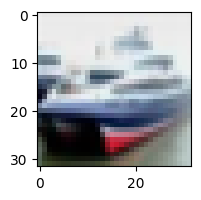

In [31]:
plot_sample(x_test, y_test,1)

In [32]:
classes[y_classes[1]]

'ship'